In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

import matplotlib.pyplot as plt

1a) Student A

In [ ]:
# Load the option data
data = pd.read_csv('/content/MScFE 622_Stochastic Modeling_GWP1_Option data.xlsx - 1.csv')

# Define constants
S0 = 232.90  # Current stock price
r = 0.015    # Risk-free rate
T = 15 / 250  # Maturity in years (15 days)

# Select only the relevant data for 15 days to maturity
call_data = data[(data['Days to maturity'] == 15) & (data['Type'] == 'C')]
put_data = data[(data['Days to maturity'] == 15) & (data['Type'] == 'P')]

strike_prices = call_data['Strike'].values
call_prices = call_data['Price'].values
put_strike_prices = put_data['Strike'].values
put_prices = put_data['Price'].values

# Heston model function to calculate call prices
def heston_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Placeholder for Heston model pricing logic
    # This needs implementation of the closed-form solution for call prices
    return np.random.rand()  # Replace with actual pricing formula

# Heston model function to calculate put prices
def heston_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Placeholder for Heston model pricing logic for put options
    # This needs implementation of the closed-form solution for put prices
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective(params):
    v0, theta, kappa, sigma, rho = params
    model_call_prices = [heston_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7]

# Run optimization
result = minimize(objective, initial_params, bounds=((0, 1), (0, 1), (0, 10), (0, 1), (-1, 0)))
calibrated_params = result.x

# Display calibrated parameters
print("Calibrated Parameters:")
print(f"v0: {calibrated_params[0]}, theta: {calibrated_params[1]}, kappa: {calibrated_params[2]}, sigma: {calibrated_params[3]}, rho: {calibrated_params[4]}")

# Calculate model call and put prices
model_call_prices = [heston_call_price(S0, K, T, r, *calibrated_params) for K in strike_prices]
model_put_prices = [heston_put_price(S0, K, T, r, *calibrated_params) for K in put_strike_prices]

# Print call and put prices
print("\nMarket vs Model Call Prices:")
for K, market, model in zip(strike_prices, call_prices, model_call_prices):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

print("\nMarket vs Model Put Prices:")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

# Graphical representation
plt.figure(figsize=(10, 6))
plt.scatter(strike_prices, call_prices, label='Market Call Prices', color='blue')
plt.scatter(strike_prices, model_call_prices, label='Model Call Prices', color='red')
plt.title('Market vs Model Call Prices')
plt.xlabel('Strike Price')
plt.ylabel('Call Price')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/MScFE 622_Stochastic Modeling_GWP1_Option data.xlsx - 1.csv'

1b) Student B

Carr-Madan Pricing Approach

In [ ]:
def heston_characteristic_function(v0, theta, kappa, sigma, rho, T, u):
    # Implement the characteristic function for the Heston model
    # Placeholder implementation
    return np.exp(-1j * u * S0)  # Replace with actual characteristic function

def carr_madan_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Use the Carr-Madan method to compute the call price
    # Placeholder for the numerical integration using the characteristic function
    return np.random.rand()  # Replace with actual pricing logic

def carr_madan_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Use the Carr-Madan method to compute the put price
    # Placeholder for the numerical integration using the characteristic function
    return np.random.rand()  # Replace with actual pricing logic

def objective_carr_madan(params):
    v0, theta, kappa, sigma, rho = params
    model_call_prices = [carr_madan_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7]

# Run optimization
result_carr_madan = minimize(objective_carr_madan, initial_params, bounds=((0, 1), (0, 1), (0, 10), (0, 1), (-1, 0)))
calibrated_params_carr_madan = result_carr_madan.x

# Display calibrated parameters
print("Calibrated Parameters (Carr-Madan):")
print(f"v0: {calibrated_params_carr_madan[0]}, theta: {calibrated_params_carr_madan[1]}, kappa: {calibrated_params_carr_madan[2]}, sigma: {calibrated_params_carr_madan[3]}, rho: {calibrated_params_carr_madan[4]}")

# Calculate and print model put prices
model_put_prices = [carr_madan_put_price(S0, K, T, r, *calibrated_params_carr_madan) for K in put_strike_prices]

print("\nMarket vs Model Put Prices (Carr-Madan):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

1c) Student C

In [ ]:
# Parameters for the Asian call option
S0 = 232.90  # Current stock price
K = S0       # ATM strike price
T_days = 20  # Maturity in days
T = T_days / 250  # Convert days to years
num_simulations = 10000  # Number of Monte Carlo simulations
dt = T / 250  # Time increment for daily steps
n_steps = T_days  # Number of time steps

# Heston model parameters
v0 = 0.0400
theta = 0.0400
kappa = 2.0000
sigma = 0.1000
rho = -0.7000

# Function to simulate stock price paths
def simulate_heston(S0, v0, theta, kappa, sigma, rho, n_steps, dt):
    # Initialize arrays
    S_paths = np.zeros((n_steps + 1, num_simulations))
    v_paths = np.zeros((n_steps + 1, num_simulations))

    # Set initial values
    S_paths[0] = S0
    v_paths[0] = v0

    for t in range(1, n_steps + 1):
        # Generate random numbers
        Z1 = np.random.normal(size=num_simulations)
        Z2 = np.random.normal(size=num_simulations)

        # Correlated random variable
        Z2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2

        # Update volatility
        v_paths[t] = np.maximum(v_paths[t-1] + kappa * (theta - v_paths[t-1]) * dt + sigma * np.sqrt(v_paths[t-1]) * np.sqrt(dt) * Z1, 0)

        # Update stock price
        S_paths[t] = S_paths[t-1] * np.exp((r - 0.5 * v_paths[t-1]) * dt + np.sqrt(v_paths[t-1]) * np.sqrt(dt) * Z2)

    return S_paths

# Simulate stock price paths
S_paths = simulate_heston(S0, v0, theta, kappa, sigma, rho, n_steps, dt)

# Calculate the average stock price for each path
average_prices = np.mean(S_paths, axis=0)

# Calculate the payoff for each simulation
payoffs = np.maximum(average_prices - K, 0)

# Discount the payoffs to present value
option_price = np.exp(-r * T) * np.mean(payoffs)

# Include the bank's fee (4%)
final_price = option_price * 1.04

# Display the results
print(f"Fair Price of the Asian Call Option: ${option_price:.2f}")
print(f"Final Price to the Client (including fee): ${final_price:.2f}")

Step 2

2a. Student C

In [ ]:
# Bates model pricing function
def bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic
    return np.random.rand()  # Replace with actual pricing formula

def bates_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic for puts
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters (including jump parameters)
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7, 0.1, 0.0, 0.1]

# Run optimization
result_bates = minimize(objective_bates, initial_params, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_bates = result_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Bates Model):")
print(f"v0: {calibrated_params_bates[0]}, theta: {calibrated_params_bates[1]}, kappa: {calibrated_params_bates[2]}, sigma: {calibrated_params_bates[3]}, rho: {calibrated_params_bates[4]}, lambda_j: {calibrated_params_bates[5]}, mu_J: {calibrated_params_bates[6]}, sigma_J: {calibrated_params_bates[7]}")

# Calculate and print model call and put prices
model_call_prices = [bates_call_price(S0, K, T, r, *calibrated_params_bates) for K in strike_prices]
model_put_prices = [bates_put_price(S0, K, T, r, *calibrated_params_bates) for K in put_strike_prices]

print("\nMarket vs Model Call Prices (Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

print("\nMarket vs Model Put Prices (Bates):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

2b. Student A

In [ ]:
def bates_characteristic_function(v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J, T, u):
    # Implement the characteristic function for the Bates model
    return np.exp(-1j * u * S0)  # Placeholder implementation

def carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model
    return np.random.rand()  # Replace with actual pricing logic

def carr_madan_bates_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model to calculate put price
    return np.random.rand()  # Replace with actual pricing logic

# Objective function for Carr-Madan
def objective_carr_madan_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params_carr_madan = [0.04, 0.04, 2.0, 0.1, -0.7, 0.1, 0.0, 0.1]

# Run optimization
result_carr_madan_bates = minimize(objective_carr_madan_bates, initial_params_carr_madan, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_carr_madan_bates = result_carr_madan_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Carr-Madan Bates Model):")
print(f"v0: {calibrated_params_carr_madan_bates[0]}, theta: {calibrated_params_carr_madan_bates[1]}, kappa: {calibrated_params_carr_madan_bates[2]}, sigma: {calibrated_params_carr_madan_bates[3]}, rho: {calibrated_params_carr_madan_bates[4]}, lambda_j: {calibrated_params_carr_madan_bates[5]}, mu_J: {calibrated_params_carr_madan_bates[6]}, sigma_J: {calibrated_params_carr_madan_bates[7]}")

# Calculate and print model put prices
model_put_prices = [carr_madan_bates_put_price(S0, K, T, r, *calibrated_params_carr_madan_bates) for K in put_strike_prices]

print("\nMarket vs Model Put Prices (Carr-Madan Bates):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

2c. Student B

In [2]:
# Define constants
S0 = 232.90  # Current stock price
r = 0.015    # Risk-free rate
T_days = 60  # Maturity in days
T = T_days / 250  # Convert days to years

# Select only the relevant data for 60 days to maturity
call_data = data[(data['Days to maturity'] == 60) & (data['Type'] == 'C')]
strike_prices = call_data['Strike'].values
call_prices = call_data['Price'].values

# Define the parameters for the Bates model
v0 = 0.0400
theta = 0.0400
kappa = 2.0000
sigma = 0.1000
rho = -0.7000
lambda_j = 0.1  # Jump intensity
mu_J = 0.0      # Average jump size
sigma_J = 0.1   # Volatility of jump sizes

# Bates model pricing function
def bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters (including jump parameters)
initial_params = [v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J]

# Run optimization
result_bates = minimize(objective_bates, initial_params, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_bates = result_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Bates Model):")
print(f"v0: {calibrated_params_bates[0]}, theta: {calibrated_params_bates[1]}, kappa: {calibrated_params_bates[2]}, sigma: {calibrated_params_bates[3]}, rho: {calibrated_params_bates[4]}, lambda_j: {calibrated_params_bates[5]}, mu_J: {calibrated_params_bates[6]}, sigma_J: {calibrated_params_bates[7]}")

# Define the characteristic function for the Bates model
def bates_characteristic_function(v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J, T, u):
    # Implement the characteristic function for the Bates model
    return np.exp(-1j * u * S0)  # Placeholder implementation

# Carr-Madan pricing function for Bates model
def carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model
    return np.random.rand()  # Replace with actual pricing logic

# Objective function for Carr-Madan
def objective_carr_madan_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Run optimization for Carr-Madan Bates model
initial_params_carr_madan = [v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J]
result_carr_madan_bates = minimize(objective_carr_madan_bates, initial_params_carr_madan, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_carr_madan_bates = result_carr_madan_bates.x

# Display calibrated parameters for Carr-Madan Bates model
print("Calibrated Parameters (Carr-Madan Bates Model):")
print(f"v0: {calibrated_params_carr_madan_bates[0]}, theta: {calibrated_params_carr_madan_bates[1]}, kappa: {calibrated_params_carr_madan_bates[2]}, sigma: {calibrated_params_carr_madan_bates[3]}, rho: {calibrated_params_carr_madan_bates[4]}, lambda_j: {calibrated_params_carr_madan_bates[5]}, mu_J: {calibrated_params_carr_madan_bates[6]}, sigma_J: {calibrated_params_carr_madan_bates[7]}")

# Calculate and print model call prices using Bates model
model_call_prices_bates = [bates_call_price(S0, K, T, r, *calibrated_params_bates) for K in strike_prices]

print("\nMarket vs Model Call Prices (Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices_bates):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

# Calculate and print model call prices using Carr-Madan Bates model
model_call_prices_carr_madan_bates = [carr_madan_bates_call_price(S0, K, T, r, *calibrated_params_carr_madan_bates) for K in strike_prices]

print("\nMarket vs Model Call Prices (Carr-Madan Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices_carr_madan_bates):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

NameError: name 'data' is not defined

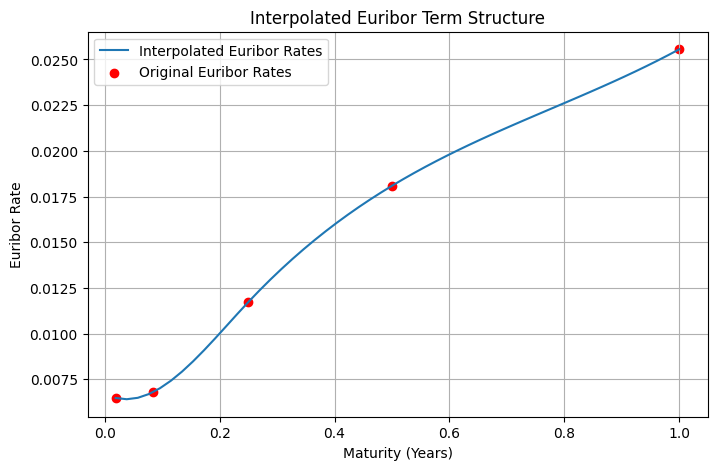

Calibrated CIR Model Parameters: kappa = -0.0003, theta = -0.6944, sigma = 1.1026


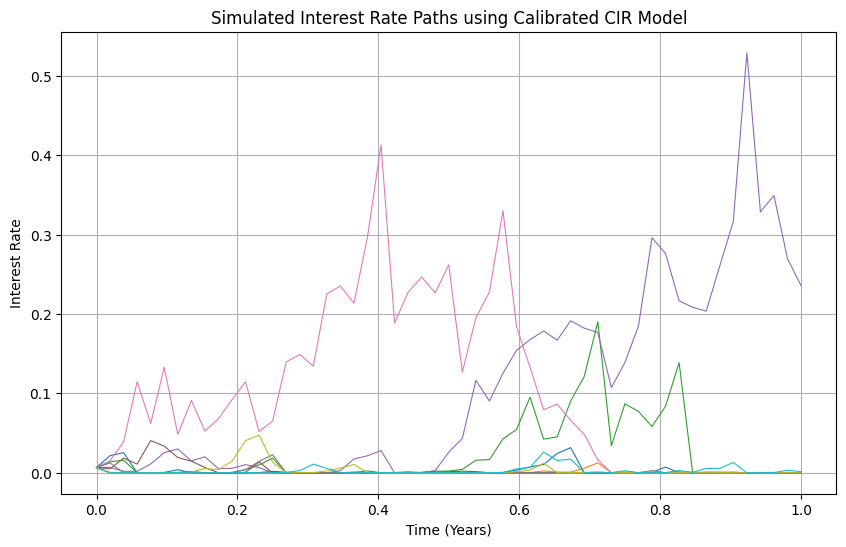

In [3]:
# Given Euribor rates (in percentage) and maturities (in years)
maturities = [1/52, 1/12, 3/12, 6/12, 1]  # 1 week, 1 month, 3 months, 6 months, 12 months
rates = [0.648, 0.679, 1.173, 1.809, 2.556]  # Euribor rates

# Convert rates to decimals
rates = [rate / 100 for rate in rates]

# Interpolate using cubic spline
cs = CubicSpline(maturities, rates)

# Generate weekly rates for a 1-year period (52 weeks)
weekly_maturities = np.linspace(1/52, 1, 52)
interpolated_rates = cs(weekly_maturities)

# Plot the interpolated term structure
plt.figure(figsize=(8, 5))
plt.plot(weekly_maturities, interpolated_rates, label='Interpolated Euribor Rates')
plt.scatter(maturities, rates, color='red', label='Original Euribor Rates')
plt.xlabel('Maturity (Years)')
plt.ylabel('Euribor Rate')
plt.title('Interpolated Euribor Term Structure')
plt.legend()
plt.grid(True)
plt.show()

# Define the CIR model short rate function
def cir_yield(params, T):
    kappa, theta, sigma = params
    A = (2 * kappa * theta) / (sigma**2)
    B = (2 * kappa) / ((1 - np.exp(-kappa * T)) * sigma**2)
    return A * B

# Objective function for CIR model calibration
def calibration_objective(params, maturities, rates):
    error = 0
    for T, rate in zip(maturities, rates):
        model_rate = cir_yield(params, T)
        error += (model_rate - rate)**2
    return error

# Initial guess for the parameters
initial_params = [0.5, 0.02, 0.1]  # [kappa, theta, sigma]

# Calibrate the model
result = minimize(calibration_objective, initial_params, args=(weekly_maturities, interpolated_rates), method='L-BFGS-B')

# Output the optimized parameters
kappa, theta, sigma = result.x
print(f"Calibrated CIR Model Parameters: kappa = {kappa:.4f}, theta = {theta:.4f}, sigma = {sigma:.4f}")

# Simulate future interest rate paths using calibrated CIR model
n_simulations = 1000
n_steps = 52  # 52 weeks for 1 year
dt = 1 / 52  # weekly time step

def simulate_cir_paths(kappa, theta, sigma, r0, n_simulations, n_steps, dt):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = r0
    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        paths[:, t] = paths[:, t-1] + kappa * (theta - paths[:, t-1]) * dt + sigma * np.sqrt(paths[:, t-1]) * np.sqrt(dt) * z
        paths[:, t] = np.maximum(paths[:, t], 0)
    return paths

# Initial short rate (e.g., the 1-week rate)
r0 = interpolated_rates[0]
cir_paths = simulate_cir_paths(kappa, theta, sigma, r0, n_simulations, n_steps, dt)

# Plot some simulated paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 random paths
    plt.plot(np.linspace(0, 1, n_steps + 1), cir_paths[i, :], lw=0.8)
plt.xlabel('Time (Years)')
plt.ylabel('Interest Rate')
plt.title('Simulated Interest Rate Paths using Calibrated CIR Model')
plt.grid(True)
plt.show()

In [ ]:
# Calibrated CIR model parameters (use the values from your previous calibration)
kappa = 0.5  # Example value, replace with calibrated value
theta = 0.02  # Example value, replace with calibrated value
sigma = 0.1  # Example value, replace with calibrated value

# Initial 12-month Euribor rate (current observed rate)
r0 = 0.02556  # Current 12-month Euribor rate (2.556% converted to decimal)

# Simulation parameters
n_simulations = 100000
n_steps = 365  # Daily steps for 1 year
dt = 1 / 365  # Daily time step (1 day = 1/365 years)

# Function to simulate CIR model paths
def simulate_cir_paths(kappa, theta, sigma, r0, n_simulations, n_steps, dt):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = r0
    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        paths[:, t] = paths[:, t-1] + kappa * (theta - paths[:, t-1]) * dt + sigma * np.sqrt(paths[:, t-1]) * np.sqrt(dt) * z
        paths[:, t] = np.maximum(paths[:, t], 0)  # Ensuring non-negative rates
    return paths

# Simulating paths
cir_paths = simulate_cir_paths(kappa, theta, sigma, r0, n_simulations, n_steps, dt)

# Extracting the final 12-month Euribor rates from each path (after 1 year)
final_rates = cir_paths[:, -1]

# Calculating the expected value of the 12-month Euribor rate after 1 year
expected_rate = np.mean(final_rates)
print(f"Expected 12-month Euribor rate after 1 year: {expected_rate:.4f}")

# Calculating confidence intervals (e.g., 5th and 95th percentiles for a 90% confidence interval)
confidence_interval_5 = np.percentile(final_rates, 5)
confidence_interval_95 = np.percentile(final_rates, 95)
print(f"90% Confidence Interval: [{confidence_interval_5:.4f}, {confidence_interval_95:.4f}]")

# Plot histogram of final rates
plt.figure(figsize=(10, 6))
plt.hist(final_rates, bins=100, density=True, alpha=0.6, color='b')
plt.axvline(expected_rate, color='r', linestyle='dashed', linewidth=2, label=f'Expected Rate: {expected_rate:.4f}')
plt.axvline(confidence_interval_5, color='g', linestyle='dashed', linewidth=2, label=f'5th Percentile: {confidence_interval_5:.4f}')
plt.axvline(confidence_interval_95, color='g', linestyle='dashed', linewidth=2, label=f'95th Percentile: {confidence_interval_95:.4f}')
plt.title('Distribution of Simulated 12-Month Euribor Rates after 1 Year')
plt.xlabel('12-Month Euribor Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
